In [ ]:
!pip install -q navec nltk  swifter
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-12-09 20:13:55--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar.4’

00q.tar.4            97%[==================> ]  49.12M  1.97MB/s    eta 1s     ^C


In [1]:
!pip install swifter
!pip install pymorphy3
!pip install nltk
!pip install navec

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from nltk.corpus import stopwords
import nltk
import swifter
import pymorphy3
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from navec import Navec
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import TSNE

In [ ]:
path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
navec['привет'].shape

(300,)

In [ ]:
!ls

1.ipynb
2.ipynb
3.ipynb
bow_matrix.npz
bow_output.csv
lemmatized_texts.pkl
navec_hudlit_v1_12B_500K_300d_100q.tar
navec_hudlit_v1_12B_500K_300d_100q.tar.1
navec_hudlit_v1_12B_500K_300d_100q.tar.2
navec_hudlit_v1_12B_500K_300d_100q.tar.3
navec_hudlit_v1_12B_500K_300d_100q.tar.4
news.csv
vectorizer.pkl


In [3]:
news_data = pd.read_csv("news.csv", delimiter=";")

In [4]:
news_data

id source_type                                              title  \
0        1        dzen  Количество раненых при нападении на магазин в ...   
1        2        dzen  Набиуллина: ипотечные ставки начнут снижаться ...   
2        3        dzen  RT выяснил личность подозреваемого в рабовладе...   
3        4        dzen    ТАСС: войска Украины пытаются покинуть Селидово   
4        5        dzen  Умер режиссер первых серий «Улиц разбитых фона...   
...    ...         ...                                                ...   
8602  7774       fomag  Юань стабилен: сильный доллар нивелирует оптим...   
8603  7774       fomag  ЮГК стремится устранить все нарушения в коротк...   
8604  7775       fomag  Южуралзолото установила диапазон размещения IP...   
8605  7775       fomag  Ян Арт про банковские вклады, облигации, золот...   
8606  7776       fomag  Яндекс во 2 кв увеличил прибыль на 45%, пообещ...   

                                                content  \
0     Число пострадавших при нападении посетителя с ...   
1     "По мере снижения инфляции ипотечные ставки бу...   
2     Как удалось выяснить, фигурант дела — 40-летни...   
3     Подразделения Вооруженных сил Украины (ВСУ) пр...   
4     Российский режиссер и сценарист Игорь Москвити...   
...                                                 ...   
8602  (Рейтер) рост доллара ввиду напряженности на Б...   
8603  МОСКВА, 14 августа. /ТАСС/. "Южуралзолото ГК" ...   
8604  (Рейтер) Российский золотодобытчик Южуралзолот...   
8605  Ключевую ставку ЦБ, конфликт на Ближнем Восток...   
8606  (Рейтер) Крупнейшая российская интернет-компан...   

                                                   link            date  \
0     https://dzen.ru/news/story/45396279-888c-507f-...  10/25/24 14:30   
1     https://dzen.ru/news/story/1c02c1ba-4c7d-5c07-...  10/25/24 15:49   
2     https://dzen.ru/news/story/3e598c32-677a-5e33-...  10/25/24 15:20   
3     https://dzen.ru/news/story/f7ba2bed-7abf-506c-...  10/25/24 15:03   
4     https://dzen.ru/news/story/f7ebd12d-543d-5214-...  10/25/24 14:52   
...                                                 ...             ...   
8602  https://fomag.ru/news-streem/yuan_stabilen_sil...  10/19/23 11:16   
8603  https://fomag.ru/news-streem/yugk-stremitsya-u...   8/14/24 10:04   
8604  https://fomag.ru/news-streem/yuzhuralzoloto_us...   11/13/23 9:54   
8605                 https://fomag.ru/news/yan-art-pro/  10/25/23 11:59   
8606  https://fomag.ru/news-streem/yandeks_vo_2_kv_u...    7/30/24 9:26   

       tags                                         post_links  \
0     index  ['https://vz.ru/news/2024/10/25/1294420.html',...   
1     index  ['https://realty.ria.ru/20241025/stavki-198010...   
2     index  ['https://russian.rt.com/russia/news/1387351-l...   
3     index  ['https://lenta.ru/news/2024/10/25/stalo-izves...   
4     index  ['https://www.kommersant.ru/doc/7263953', 'htt...   
...     ...                                                ...   
8602    NaN                                                NaN   
8603    NaN                                                NaN   
8604    NaN                                                NaN   
8605    NaN                                                NaN   
8606    NaN                                                NaN   

                                            source_link source_name  
0            https://vz.ru/news/2024/10/25/1294420.html          vz  
1     https://realty.ria.ru/20241025/stavki-19801093...         ria  
2     https://russian.rt.com/russia/news/1387351-lic...  russian.rt  
3     https://lenta.ru/news/2024/10/25/stalo-izvestn...       lenta  
4                 https://www.kommersant.ru/doc/7263953  kommersant  
...                                                 ...         ...  
8602                                                NaN     Reuters  
8603                                                NaN        tass  
8604                                              

In [ ]:
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
nltk.   download('stopwords')
stopwords_ru = stopwords.words("russian")
morph = pymorphy3.MorphAnalyzer()

def lemmatize(doc, return_list=False):
    if not isinstance(doc, str):  # Проверяем, является ли входной текст строкой
        return ""

    doc = re.sub(patterns, ' ', doc)
    tokens = []

    for token in doc.split():
        token = token.strip()

        if token and token not in stopwords_ru and token[0] != '@' and not token.isascii():
            normal_forms = morph.normal_forms(token)
            if len(normal_forms) > 0:
                token = normal_forms[0]
            tokens.append(token)

    if len(tokens) > 0:
        return tokens if return_list else ' '.join(tokens)

    return ""

<>:1: SyntaxWarning: invalid escape sequence '\]'
<>:1: SyntaxWarning: invalid escape sequence '\]'
/var/folders/7w/rn8w7g110qxcnn_wkbc9wxdc0000gq/T/ipykernel_24032/1503440200.py:1: SyntaxWarning: invalid escape sequence '\]'
  patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleksey.malysh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
news_data["content_lem"] = news_data["content"].apply(lambda x: lemmatize(x))

In [ ]:
news_data["tags"].value_counts(normalize=True)[:40].values.sum()

0.8220391669257072

In [ ]:
def vectorize(sentence, model):
    texts_vectorized = 0
    #model_keys = [key.split("_")[0] for key in list(russian_model.key_to_index.keys())]
    if sentence is None or sentence is np.nan:
      return np.zeros(300)
    else:
      texts_vectorized += 1
      words = sentence.split()
      #print("sentence len: ", len(words))
    words_vecs = [model[word] for word in words if word in model]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

vectorized_news = np.array([vectorize(sentence, navec) for sentence in news_data["content_lem"]])

In [ ]:
vectorized_news.shape

(8607, 300)

In [ ]:
def plot_elbow_rule(X, K=40):
  values = []
  for k in range(1, K):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    value = np.array([((X[labels == i, :] - centers[i, :]) ** 2).sum(axis=1).sum() for i in range(k)])
    values.append(value.sum())
  plt.plot(values)
  plt.show()

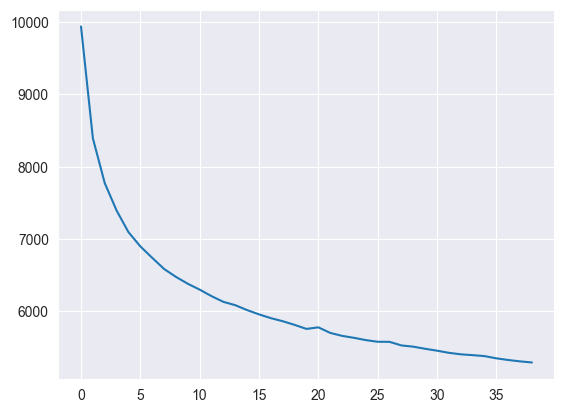

In [ ]:
plot_elbow_rule(vectorized_news)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
pca = PCA(random_state=42)

In [ ]:
X_train, X_test = train_test_split(vectorized_news, train_size=0.85, random_state=42)

In [ ]:
kmeans.fit(X_train)

KMeans(n_clusters=5, random_state=42)

In [ ]:
y_pred = kmeans.predict(X_test)
y_train = kmeans.predict(X_train)
print("train score: ", silhouette_score(X_train, y_train))
print("test score: ", silhouette_score(X_test, y_pred))

train score:  0.1291335389726412
test score:  0.13454517838868818


In [ ]:
print("train score: ", davies_bouldin_score(X_train, y_train))
print("test score: ", davies_bouldin_score(X_test, y_pred))

train score:  2.3715298580702475
test score:  2.344613293646539


классическиt методы векторизации + еще одна внутреннюю метрику Calinski-Harabasz Index

In [ ]:
news_data

id source_type                                              title  \
0        1        dzen  Количество раненых при нападении на магазин в ...   
1        2        dzen  Набиуллина: ипотечные ставки начнут снижаться ...   
2        3        dzen  RT выяснил личность подозреваемого в рабовладе...   
3        4        dzen    ТАСС: войска Украины пытаются покинуть Селидово   
4        5        dzen  Умер режиссер первых серий «Улиц разбитых фона...   
...    ...         ...                                                ...   
8602  7774       fomag  Юань стабилен: сильный доллар нивелирует оптим...   
8603  7774       fomag  ЮГК стремится устранить все нарушения в коротк...   
8604  7775       fomag  Южуралзолото установила диапазон размещения IP...   
8605  7775       fomag  Ян Арт про банковские вклады, облигации, золот...   
8606  7776       fomag  Яндекс во 2 кв увеличил прибыль на 45%, пообещ...   

                                                content  \
0     Число пострадавших при нападении посетителя с ...   
1     "По мере снижения инфляции ипотечные ставки бу...   
2     Как удалось выяснить, фигурант дела — 40-летни...   
3     Подразделения Вооруженных сил Украины (ВСУ) пр...   
4     Российский режиссер и сценарист Игорь Москвити...   
...                                                 ...   
8602  (Рейтер) рост доллара ввиду напряженности на Б...   
8603  МОСКВА, 14 августа. /ТАСС/. "Южуралзолото ГК" ...   
8604  (Рейтер) Российский золотодобытчик Южуралзолот...   
8605  Ключевую ставку ЦБ, конфликт на Ближнем Восток...   
8606  (Рейтер) Крупнейшая российская интернет-компан...   

                                                   link            date  \
0     https://dzen.ru/news/story/45396279-888c-507f-...  10/25/24 14:30   
1     https://dzen.ru/news/story/1c02c1ba-4c7d-5c07-...  10/25/24 15:49   
2     https://dzen.ru/news/story/3e598c32-677a-5e33-...  10/25/24 15:20   
3     https://dzen.ru/news/story/f7ba2bed-7abf-506c-...  10/25/24 15:03   
4     https://dzen.ru/news/story/f7ebd12d-543d-5214-...  10/25/24 14:52   
...                                                 ...             ...   
8602  https://fomag.ru/news-streem/yuan_stabilen_sil...  10/19/23 11:16   
8603  https://fomag.ru/news-streem/yugk-stremitsya-u...   8/14/24 10:04   
8604  https://fomag.ru/news-streem/yuzhuralzoloto_us...   11/13/23 9:54   
8605                 https://fomag.ru/news/yan-art-pro/  10/25/23 11:59   
8606  https://fomag.ru/news-streem/yandeks_vo_2_kv_u...    7/30/24 9:26   

       tags                                         post_links  \
0     index  ['https://vz.ru/news/2024/10/25/1294420.html',...   
1     index  ['https://realty.ria.ru/20241025/stavki-198010...   
2     index  ['https://russian.rt.com/russia/news/1387351-l...   
3     index  ['https://lenta.ru/news/2024/10/25/stalo-izves...   
4     index  ['https://www.kommersant.ru/doc/7263953', 'htt...   
...     ...                                                ...   
8602    NaN                                                NaN   
8603    NaN                                                NaN   
8604    NaN                                                NaN   
8605    NaN                                                NaN   
8606    NaN                                                NaN   

                                            source_link source_name  
0            https://vz.ru/news/2024/10/25/1294420.html          vz  
1     https://realty.ria.ru/20241025/stavki-19801093...         ria  
2     https://russian.rt.com/russia/news/1387351-lic...  russian.rt  
3     https://lenta.ru/news/2024/10/25/stalo-izvestn...       lenta  
4                 https://www.kommersant.ru/doc/7263953  kommersant  
...                                                 ...         ...  
8602                                                NaN     Reuters  
8603                                                NaN        tass  
8604                                              

In [ ]:
df_t_c = news_data[['title', 'content']].copy()
df_t_c

title  \
0     Количество раненых при нападении на магазин в ...   
1     Набиуллина: ипотечные ставки начнут снижаться ...   
2     RT выяснил личность подозреваемого в рабовладе...   
3       ТАСС: войска Украины пытаются покинуть Селидово   
4     Умер режиссер первых серий «Улиц разбитых фона...   
...                                                 ...   
8602  Юань стабилен: сильный доллар нивелирует оптим...   
8603  ЮГК стремится устранить все нарушения в коротк...   
8604  Южуралзолото установила диапазон размещения IP...   
8605  Ян Арт про банковские вклады, облигации, золот...   
8606  Яндекс во 2 кв увеличил прибыль на 45%, пообещ...   

                                                content  
0     Число пострадавших при нападении посетителя с ...  
1     "По мере снижения инфляции ипотечные ставки бу...  
2     Как удалось выяснить, фигурант дела — 40-летни...  
3     Подразделения Вооруженных сил Украины (ВСУ) пр...  
4     Российский режиссер и сценарист Игорь Москвити...  
...                                                 ...  
8602  (Рейтер) рост доллара ввиду напряженности на Б...  
8603  МОСКВА, 14 августа. /ТАСС/. "Южуралзолото ГК" ...  
8604  (Рейтер) Российский золотодобытчик Южуралзолот...  
8605  Ключевую ставку ЦБ, конфликт на Ближнем Восток...  
8606  (Рейтер) Крупнейшая российская интернет-компан...  

[8607 rows x 2 columns]

In [ ]:
df_t_c['text'] = df_t_c['title'] + '. ' + df_t_c['content']
df_t_c.loc[:, 'text'] = df_t_c['text'].apply(lambda x: str(x).lower())
df_t_c['text'][0]

'количество раненых при нападении на магазин в петербурге выросло до пяти человек. число пострадавших при нападении посетителя с ножом в магазине «окей» на проспекте космонавтов в петербурге увеличилось до пяти, сообщили в пресс-службе комитета здравоохранения города. «четверо пациентов в тяжёлом состоянии и один в состоянии средней степени тяжести доставлены в городскую больницу №26 и нии скорой помощи имени джанелидзе», – говорится в сообщении. подозреваемого задержали на месте преступления. сам нападавший также доставлен в медицинское учреждение.'

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

pattern = r'[^\w\s]'

def preprocess_text(df: pd.Series) -> pd.Series:
    df = df.apply(lambda x: re.sub(pattern, '', str(x)))
    df_ = df.apply(lambda x: word_tokenize(x, language='russian'))
    stop_words = set(stopwords.words('russian'))
    df_ = df_.apply(lambda x: [word for word in x if word not in stop_words])
    df_ = df_.apply(lambda x: ' '.join(x))
    return df_

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_vr1 = preprocess_text(df_t_c['text'])
df_vr1

0       количество раненых нападении магазин петербург...
1       набиуллина ипотечные ставки начнут снижаться м...
2       rt выяснил личность подозреваемого рабовладени...
3       тасс войска украины пытаются покинуть селидово...
4       умер режиссер первых серий улиц разбитых фонар...
                              ...                        
8602    юань стабилен сильный доллар нивелирует оптими...
8603    югк стремится устранить нарушения короткий сро...
8604    южуралзолото установила диапазон размещения ip...
8605    ян арт банковские вклады облигации золото акци...
8606    яндекс 2 кв увеличил прибыль 45 пообещал первы...
Name: text, Length: 8607, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

BoW = CountVectorizer()
df_vr1_vectorized = BoW.fit_transform(df_vr1)
df_vr1_vectorized.shape

(8607, 55966)

In [ ]:
tf_idf = TfidfVectorizer()
df_vr2_vectorized = tf_idf.fit_transform(df_vr1)
df_vr2_vectorized.shape

(8607, 55966)

In [ ]:
print(tf_idf.get_feature_names_out())

['000' '00239' '003' ... 'ґрунт' 'қазын' 'شاورما']


In [ ]:
print(BoW.get_feature_names_out())

['000' '00239' '003' ... 'ґрунт' 'қазын' 'شاورما']


In [ ]:
def elbow_method(matrix, max_clusters=10):
    sse = []
    k_range = range(1, max_clusters+1)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(matrix)
        sse.append(kmeans.inertia_)
    return k_range, sse

In [ ]:
k_range_tfidf, sse_tfidf = elbow_method(df_vr2_vectorized)
k_range_bof, sse_bof = elbow_method(df_vr1_vectorized)

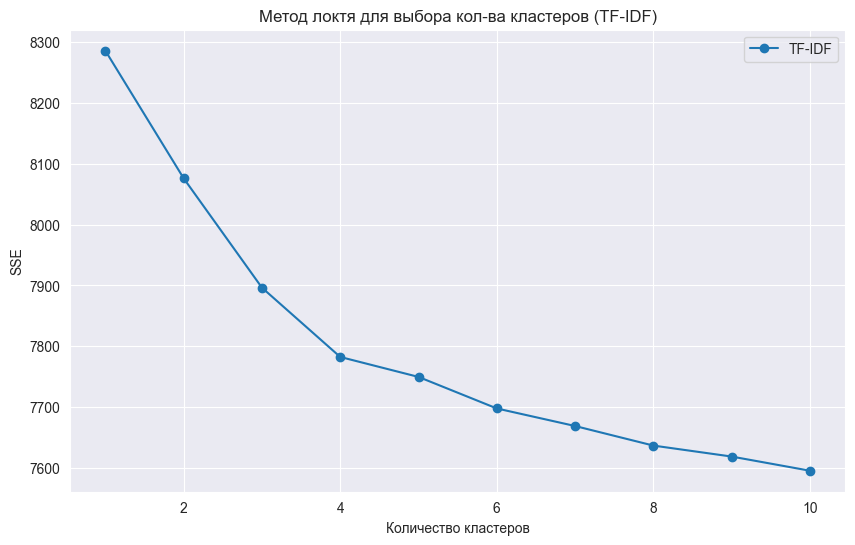

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_tfidf, sse_tfidf, marker='o', label='TF-IDF')
plt.xlabel('Количество кластеров')
plt.ylabel('SSE')
plt.title('Метод локтя для выбора кол-ва кластеров (TF-IDF)')
plt.legend()
plt.show()

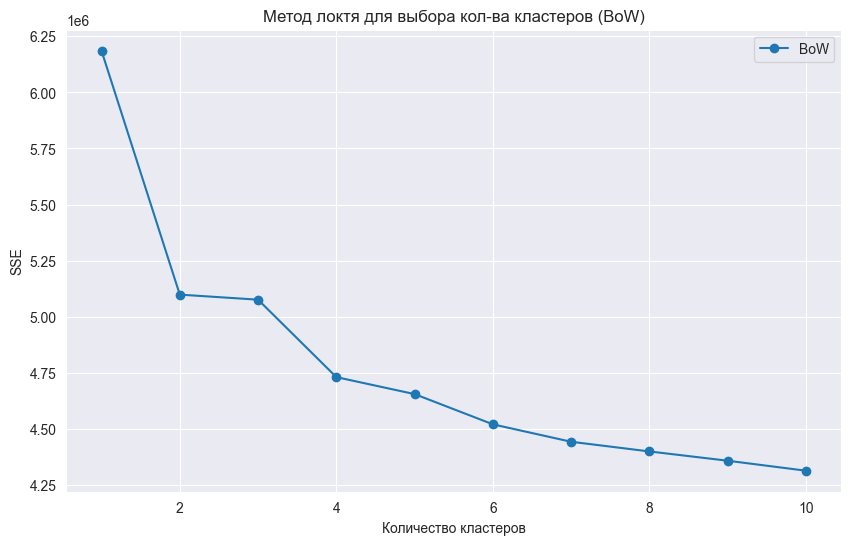

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_bof, sse_bof, marker='o', label='BoW')
plt.xlabel('Количество кластеров')
plt.ylabel('SSE')
plt.title('Метод локтя для выбора кол-ва кластеров (BoW)')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train_BoW, X_test_BoW = train_test_split(df_vr1_vectorized, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf = train_test_split(df_vr2_vectorized, test_size=0.2, random_state=42)

optim_k = 6
kmeans_model_BoW = KMeans(n_clusters=optim_k, random_state=42)
kmeans_model_BoW.fit(X_train_BoW)

KMeans(n_clusters=6, random_state=42)

In [ ]:
kmeans_model_BoW.fit(X_train_BoW)
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X_train_pred_BoW = kmeans_model_BoW.predict(X_train_BoW)
X_test_pred_BoW = kmeans_model_BoW.predict(X_test_BoW)

X_train_BoW_dense = X_train_BoW.toarray()
X_test_BoW_dense = X_test_BoW.toarray()

silhouette_score_train = silhouette_score(X_train_BoW_dense, X_train_pred_BoW)
davies_bouldin_score_train = davies_bouldin_score(X_train_BoW_dense, X_train_pred_BoW)
calinski_harabasz_score_train = calinski_harabasz_score(X_train_BoW_dense, X_train_pred_BoW)

silhouette_score_test = silhouette_score(X_test_BoW_dense, X_test_pred_BoW)
davies_bouldin_score_test = davies_bouldin_score(X_test_BoW_dense, X_test_pred_BoW)
calinski_harabasz_score_test = calinski_harabasz_score(X_test_BoW_dense, X_test_pred_BoW)

print('k-means trained on BoW:')
print('-' * 35)
print(
    f'Silhouette score training: {silhouette_score_train:.3f}\n'
    f'Davies Bouldin training: {davies_bouldin_score_train:.3f}\n'
    f'Calinski-Harabasz Index training: {calinski_harabasz_score_train:.3f}')
print('-' * 35)
print(
    f'Silhouette score testing: {silhouette_score_test:.3f}\n'
    f'Davies Bouldin testing: {davies_bouldin_score_test:.3f}\n'
    f'Calinski-Harabasz Index testing: {calinski_harabasz_score_test:.3f}')

k-means trained on BoW:
-----------------------------------
Silhouette score training: 0.276
Davies Bouldin training: 2.557
Calinski-Harabasz Index training: 544.637
-----------------------------------
Silhouette score testing: 0.290
Davies Bouldin testing: 2.963
Calinski-Harabasz Index testing: 196.203


In [ ]:
kmeans_model_tfidf = KMeans(n_clusters=optim_k, random_state=42)
kmeans_model_tfidf.fit(X_train_tfidf)

X_train_pred_tfidf = kmeans_model_tfidf.predict(X_train_tfidf)
X_test_pred_tfidf = kmeans_model_tfidf.predict(X_test_tfidf)

X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

silhouette_score_train = silhouette_score(X_train_tfidf_dense, X_train_pred_tfidf)
davies_bouldin_score_train = davies_bouldin_score(X_train_tfidf_dense, X_train_pred_tfidf)
calinski_harabasz_score_train = calinski_harabasz_score(X_train_tfidf_dense, X_train_pred_tfidf)

silhouette_score_test = silhouette_score(X_test_tfidf_dense, X_test_pred_tfidf)
davies_bouldin_score_test = davies_bouldin_score(X_test_tfidf_dense, X_test_pred_tfidf)
calinski_harabasz_score_test = calinski_harabasz_score(X_test_tfidf_dense, X_test_pred_tfidf)

print('k-means trained on TF-IDF:')
print('-' * 35)
print(
      f'Silhouette score training: {silhouette_score_train:.3f}\n'
      f'Davies Bouldin training: {davies_bouldin_score_train:.3f}\n'
      f'Calinski-Harabasz Index training: {calinski_harabasz_score_train:.3f}')
print('-' * 35)
print(
      f'Silhouette score testing: {silhouette_score_test:.3f}\n'
      f'Davies Bouldin testing: {davies_bouldin_score_test:.3f}\n'
      f'Calinski-Harabasz Index testing: {calinski_harabasz_score_test:.3f}')

k-means trained on TF-IDF:
-----------------------------------
Silhouette score training: 0.033
Davies Bouldin training: 6.956
Calinski-Harabasz Index training: 101.887
-----------------------------------
Silhouette score testing: 0.035
Davies Bouldin testing: 6.700
Calinski-Harabasz Index testing: 27.033


In [ ]:
morph = pymorphy3.MorphAnalyzer()

def lemmatize_with_pymorphy(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return ' '.join(morph.parse(word)[0].normal_form for word in words)

In [ ]:
texts = news_data['content_lem'].dropna()
lemmatized_texts = texts.swifter.apply(lemmatize_with_pymorphy)


# Сохраняем в pickle
with open("lemmatized_texts.pkl", "wb") as f:
    pickle.dump(lemmatized_texts, f)

Pandas Apply:   0%|          | 0/8607 [00:00<?, ?it/s]

In [ ]:
# Загружаем из pickle
with open("lemmatized_texts.pkl", "rb") as f:
    lemmatized_texts = pickle.load(f)

In [ ]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(lemmatized_texts)

from scipy.sparse import save_npz

# Сохраняем векторизатор
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Сохраняем разреженную матрицу
save_npz("bow_matrix.npz", bow_matrix)

In [ ]:
from scipy.sparse import load_npz

# Загружаем векторизатор
with open("vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

# Загружаем разреженную матрицу
loaded_bow_matrix = load_npz("bow_matrix.npz")

In [ ]:
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

bow_df.index = bow_df.index + 1

bow_df.to_csv('bow_output.csv', index=True, index_label='id', sep=";")

In [ ]:
news_data['text'] =news_data['title'] + '. ' + news_data['content_lem']
news_data.loc[:, 'text'] = news_data['text'].apply(lambda x: str(x).lower())

lemmatized_texts = texts.apply(lemmatize_with_pymorphy)

vectorizer = CountVectorizer()
bow_matrix_not_dropna = vectorizer.fit_transform(lemmatized_texts)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(bow_matrix_not_dropna)

silhouette_avg = silhouette_score(bow_matrix_not_dropna, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.29


In [ ]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(bow_matrix_not_dropna)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx+1}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

Topic #1:
год, млрд, рубль, компания, млн, составить, руб, квартал, также, тыс
Topic #2:
год, акция, рост, компания, рубль, рынок, цена, бумага, уровень, ставка
Topic #3:
банк, это, ставка, рынок, который, эксперт, год, цб, инвестор, россия
Topic #4:
год, компания, российский, россия, который, страна, нефть, рф, сша, также
Topic #5:
россия, который, год, это, сигнал, медуза, тот, человек, работать, по


In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(bow_matrix)

In [ ]:
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(bow_matrix.toarray())

In [ ]:
plot_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
plot_data['Cluster'] = clusters

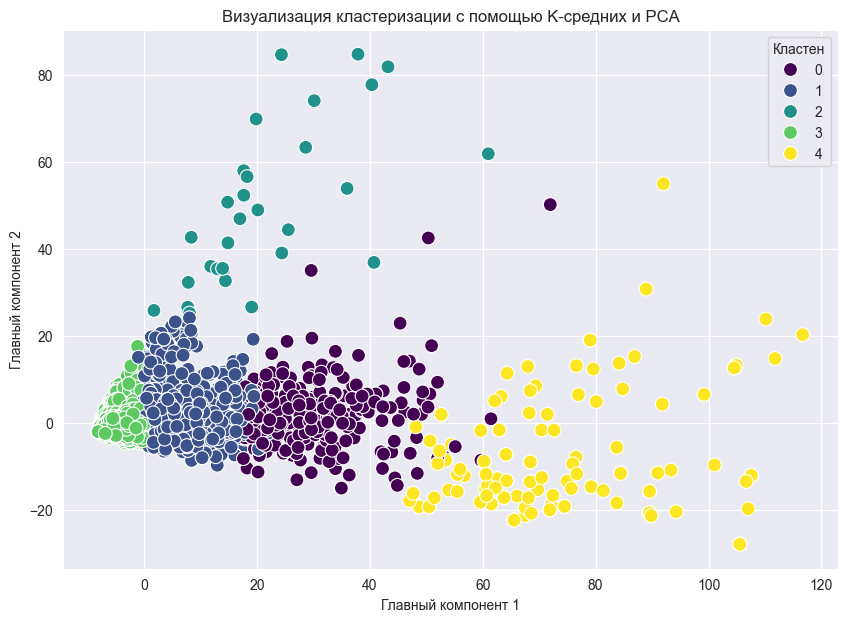

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('Визуализация кластеризации с помощью K-средних и PCA')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.legend(title='Кластен')
plt.grid(True)
plt.show()

In [ ]:
word_frequencies = bow_df.sum(axis=0).sort_values(ascending=False)

In [ ]:
top_n = 50
top_words = word_frequencies.head(top_n)

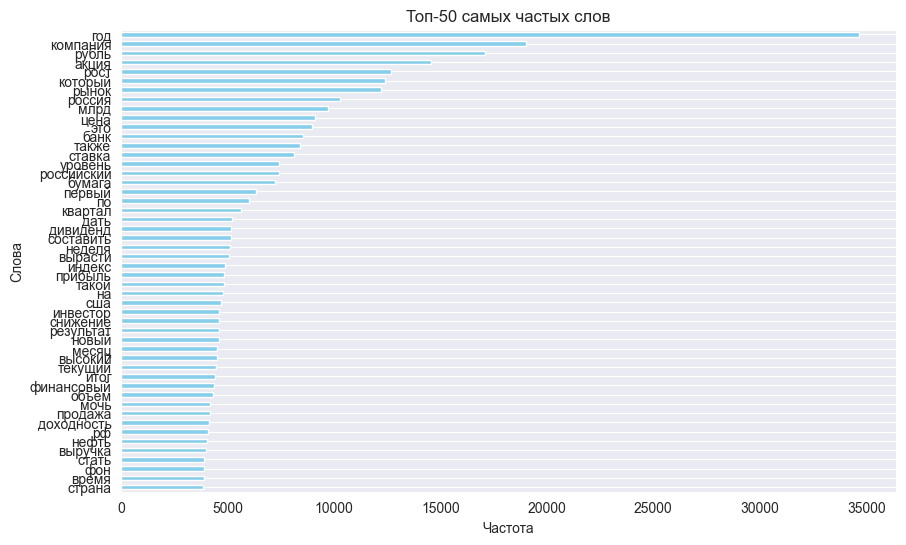

In [ ]:
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh', color='skyblue')
plt.title('Топ-50 самых частых слов')
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [ ]:
news_data['date'] = pd.to_datetime(news_data['date'], format='%m/%d/%y %H:%M', errors='coerce')
word_over_time = bow_df[top_words.index].groupby(news_data['date'].dt.to_period('M')).sum()

<Figure size 1200x600 with 0 Axes>

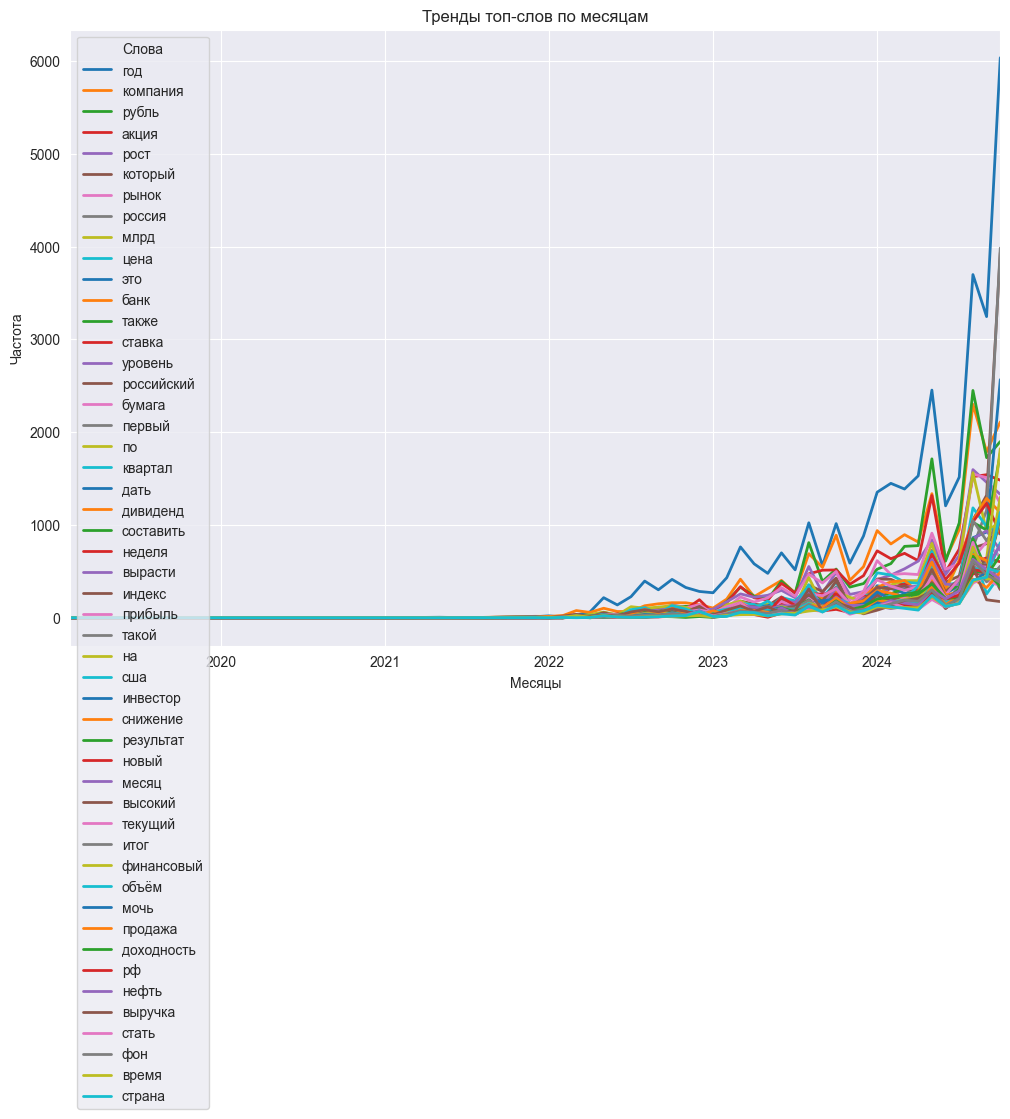

In [ ]:
plt.figure(figsize=(12, 6))
word_over_time.plot(figsize=(12, 8), linewidth=2)
plt.title('Тренды топ-слов по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Частота')
plt.legend(title='Слова')
plt.grid(True)
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_texts)

In [ ]:
doc_index = 0
tfidf_scores = pd.Series(tfidf_matrix[doc_index].toarray().flatten(), index=tfidf_vectorizer.get_feature_names_out())
top_tfidf_words = tfidf_scores.sort_values(ascending=False).head(10)

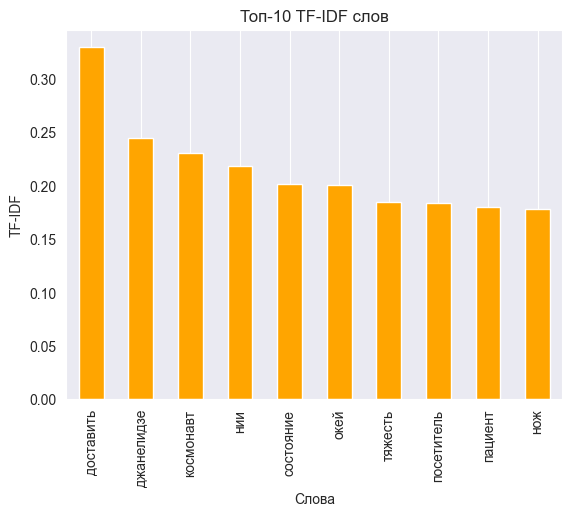

In [ ]:
top_tfidf_words.plot(kind='bar', color='orange')
plt.title(f'Топ-10 TF-IDF слов')
plt.xlabel('Слова')
plt.ylabel('TF-IDF')
plt.grid(axis='y')
plt.show()

In [ ]:
!pip install transformers torch sentencepiece -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Загрузка модели RuBERT
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

# Проверка на наличие GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Токенизация с использованием RuBERT
def preprocess_and_tokenize(text, tokenizer, max_length=128):
    tokens = tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return tokens

news_data["tokens"] = news_data["content_lem"].apply(lambda x: preprocess_and_tokenize(x, tokenizer))

In [ ]:
def generate_embeddings(tokens, model):
    with torch.no_grad():
        tokens = {key: val.to(device) for key, val in tokens.items()}
        outputs = model(**tokens)
        # Используем эмбеддинг CLS токена
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return embeddings

# Генерация эмбеддингов для всех текстов
news_data["embeddings"] = news_data["tokens"].apply(lambda x: generate_embeddings(x, model))
embeddings = np.vstack(news_data["embeddings"].values)

In [ ]:
# Кластеризация текстов с помощью KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Сохранение кластеров в данные
news_data["cluster"] = clusters

In [ ]:
# Вычисление метрик кластеризации
sil_score = silhouette_score(embeddings, clusters)
db_score = davies_bouldin_score(embeddings, clusters)

print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.09846770763397217
Davies-Bouldin Score: 2.692963680392415


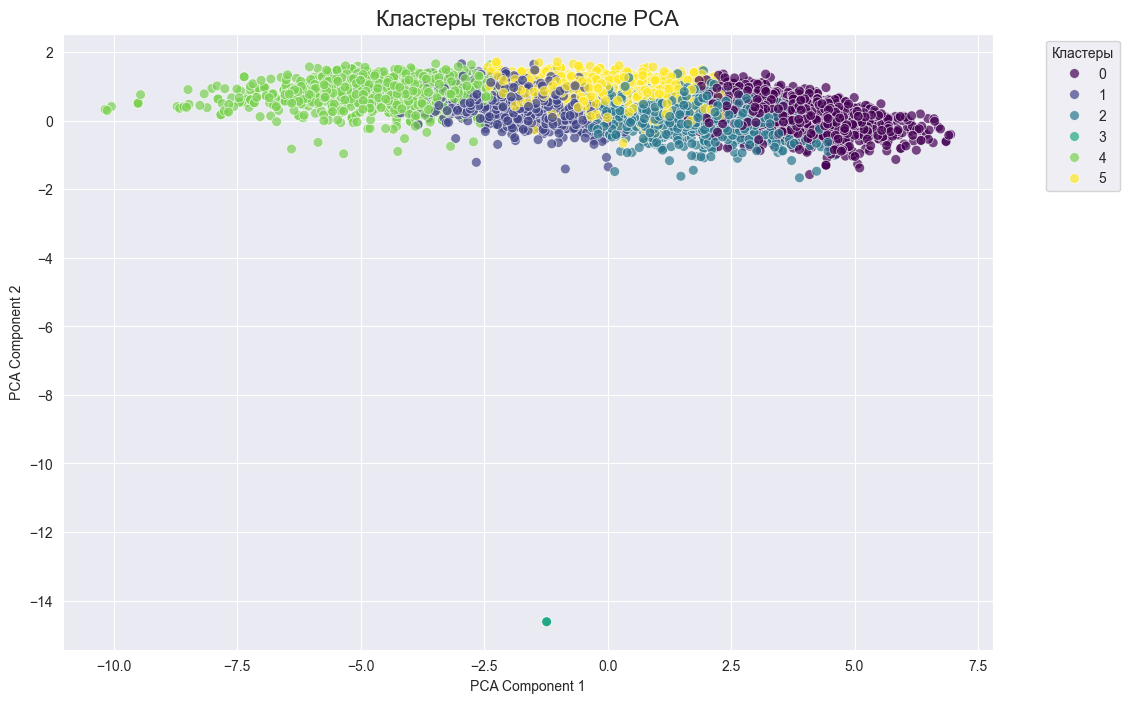

In [ ]:
# Уменьшение размерности с помощью PCA до 2D
pca = PCA(n_components=2, random_state=42)
reduced_embeddings = pca.fit_transform(embeddings)

# Добавление координат в DataFrame
news_data["x"] = reduced_embeddings[:, 0]
news_data["y"] = reduced_embeddings[:, 1]

# Визуализация кластеров
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="x", y="y", hue="cluster", data=news_data, palette="viridis", s=50, alpha=0.7
)
plt.title("Кластеры текстов после PCA", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Кластеры", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

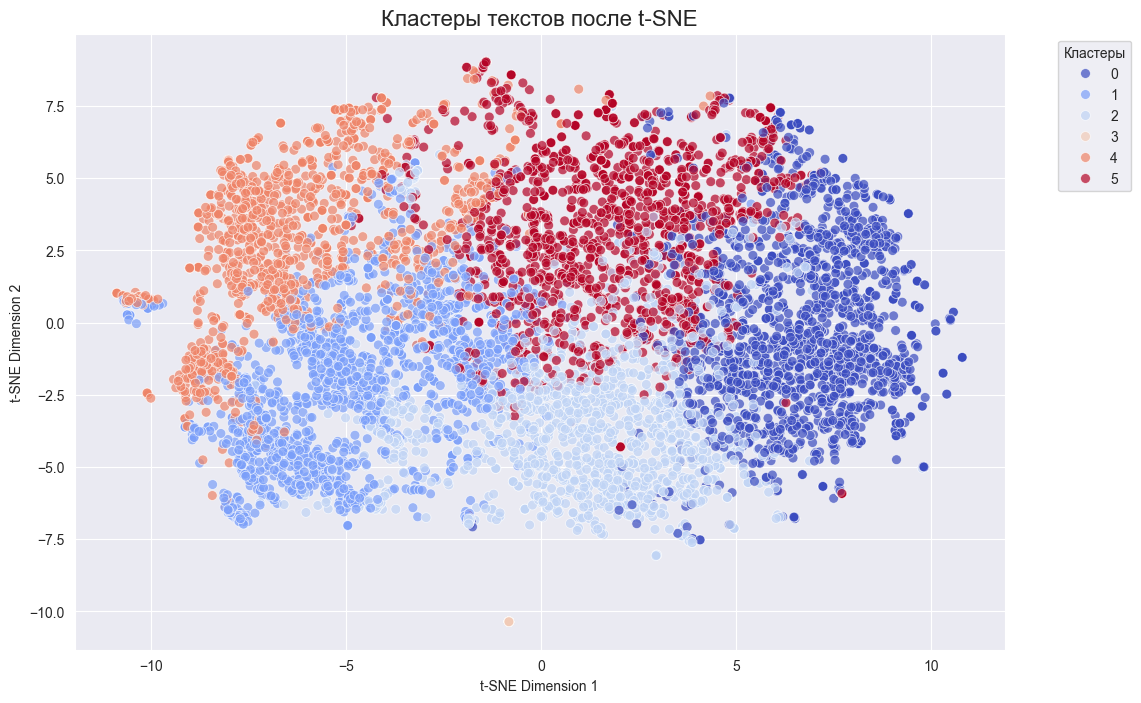

In [ ]:
from sklearn.manifold import TSNE

# Уменьшение размерности с помощью t-SNE до 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(embeddings)

# Добавление координат в DataFrame
news_data["tsne_x"] = tsne_embeddings[:, 0]
news_data["tsne_y"] = tsne_embeddings[:, 1]

# Визуализация кластеров
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne_x", y="tsne_y", hue="cluster", data=news_data, palette="coolwarm", s=50, alpha=0.7
)
plt.title("Кластеры текстов после t-SNE", fontsize=16)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Кластеры", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

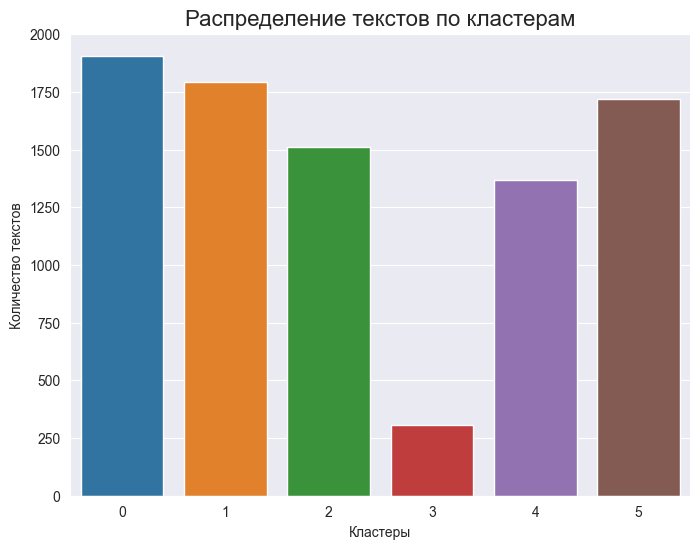

In [ ]:
# Гистограмма распределения
plt.figure(figsize=(8, 6))
sns.countplot(x="cluster", data=news_data, palette="tab10")
plt.title("Распределение текстов по кластерам", fontsize=16)
plt.xlabel("Кластеры")
plt.ylabel("Количество текстов")
plt.show()

In [ ]:
# Пример по кластерам
for cluster_id in news_data["cluster"].unique():
    print(f"\n=== Кластер {cluster_id} ===")
    cluster_texts = news_data[news_data["cluster"] == cluster_id]["content_lem"]

    # Проверяем наличие текстов в кластере
    if len(cluster_texts) > 0:
        sample_texts = cluster_texts.sample(min(5, len(cluster_texts)), random_state=42)
        for i, text in enumerate(sample_texts, 1):
            print(f"{i}. {text[:200]}...")
    else:
        print("Нет текстов в этом кластере.")


=== Кластер 4 ===
1. анонсировать новый накопитель предназначить задача связанный искусственный интеллект заявить скорость последовательный чтение накопитель составлять мбайт последовательный запись мбайт цена новый устро...
2. кадр вчерашний взрыв газ стерлитамак который пострадать несколько человек видно пламя накрывать пробегать мимо рабочий проезжать фура...
3. в конец сентябрь роскомнадзор вынести пять решений нарушение российский законодательство отношение мессенджер в ведомство заявить потребовать платформа удалить тысяча материал который ркн считать пр...
4. аудиоверсия текст слушайт «радио медуза»«ть первый день вторжение мир перевернуться произойти катастрофа невероятный масштаб говорить катерина сергацков украинский журналистка директор организация ж...
5. авто официально снять видео представить официальный видеотизер обновить кроссовер который появиться продажа ноябрь на тизер показать вертикальный дхо который вкупе изменить решётка радиатор сделать пе...

=== Кластер 

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words("russian")) | set(string.punctuation)

# Функция для извлечения частотных слов в кластере
def get_top_words(texts, top_n=10):
    all_words = " ".join(texts).split()
    filtered_words = [word.lower() for word in all_words if word.lower() not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

# Вывод ключевых слов для каждого кластера
for cluster_id in news_data["cluster"].unique():
    cluster_texts = news_data[news_data["cluster"] == cluster_id]["content_lem"]
    top_words = get_top_words(cluster_texts, top_n=10)
    print(f"\n=== Кластер {cluster_id} ===")
    print("Основные темы (частотные слова):")
    for word, count in top_words:
        print(f"{word}: {count}")


=== Кластер 4 ===
Основные темы (частотные слова):
год: 1809
который: 932
россия: 930
рубль: 834
это: 775
компания: 641
млрд: 543
также: 530
•: 475
российский: 450

=== Кластер 0 ===
Основные темы (частотные слова):
год: 14114
компания: 8257
акция: 7523
рост: 7302
рубль: 6866
рынок: 5413
цена: 4910
г: 4669
ставка: 4445
уровень: 4268

=== Кластер 1 ===
Основные темы (частотные слова):
год: 4019
который: 2579
россия: 2260
это: 2069
также: 1302
компания: 1229
«сигнал»: 1195
страна: 1114
рф: 1013
работать: 1009

=== Кластер 2 ===
Основные темы (частотные слова):
год: 5542
компания: 3586
который: 2172
рубль: 1938
россия: 1765
банк: 1632
акция: 1520
российский: 1514
млрд: 1349
также: 1325

=== Кластер 5 ===
Основные темы (частотные слова):
год: 9094
рубль: 6441
компания: 5182
акция: 4786
рынок: 4644
рост: 3739
млрд: 3243
–: 3060
цена: 2816
банк: 2729

=== Кластер 3 ===
Основные темы (частотные слова):


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Функция для извлечения частотных биграмм
def get_top_bigrams(texts, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=list(stop_words))
    bigrams_matrix = vectorizer.fit_transform(texts)
    bigram_counts = bigrams_matrix.sum(axis=0)
    bigrams = vectorizer.get_feature_names_out()
    bigram_frequencies = [(bigrams[i], bigram_counts[0, i]) for i in range(len(bigrams))]
    return sorted(bigram_frequencies, key=lambda x: x[1], reverse=True)[:top_n]

# Вывод биграмм для каждого кластера
for cluster_id in news_data["cluster"].unique():
    cluster_texts = news_data[news_data["cluster"] == cluster_id]["content_lem"]
    top_bigrams = get_top_bigrams(cluster_texts, top_n=10)
    print(f"\n=== Кластер {cluster_id} ===")
    print("Основные темы (биграммы):")
    for bigram, count in top_bigrams:
        print(f"{bigram}: {count}")


=== Кластер 4 ===
Основные темы (биграммы):
россии ский: 299
млрд рубль: 282
пока россия: 214
понимать новость: 213
условие использование: 213
защита спам: 212
имеи ть: 212
интернет защита: 212
использование подробный: 212
конфиденциальность условие: 212

=== Кластер 0 ===
Основные темы (биграммы):
млрд рубль: 2406
чистый прибыль: 1325
ключевой ставка: 1155
год год: 1092
первый полугодие: 1051
ценный бумага: 1043
банк россия: 932
второй квартал: 826
индекс мосбиржа: 754
квартал год: 728

=== Кластер 1 ===
Основные темы (биграммы):
пора пока: 605
имеи ть: 598
помогать понимать: 598
ть рассылка: 598
защита спам: 597
интернет защита: 597
использование подробный: 597
конфиденциальность условие: 597
медузы помогать: 597
новость работать: 597

=== Кластер 2 ===
Основные темы (биграммы):
млрд рубль: 728
банк россия: 320
пресс служба: 290
говориться сообщение: 230
конец год: 226
чистый прибыль: 226
совет директор: 224
год год: 207
ценный бумага: 203
составить млрд: 200

=== Кластер 5 ===
Осно

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

NameError: name 'AutoTokenizer' is not defined

In [ ]:
def preprocess_and_tokenize(text, tokenizer, max_length=128):
    tokens = tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return tokens

def generate_embeddings(tokens, model):
    with torch.no_grad():
        tokens = {key: val.to(device) for key, val in tokens.items()}
        outputs = model(**tokens)
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return embeddings

In [ ]:
# Визуализация кластеров
def plot_clusters(reduced_embeddings, clusters, title):
    news_data["x"] = reduced_embeddings[:, 0]
    news_data["y"] = reduced_embeddings[:, 1]
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x="x", y="y", hue=clusters, data=news_data, palette="viridis", s=50, alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Кластеры", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

In [ ]:
news_data["tokens"] = news_data["content_lem"].apply(lambda x: preprocess_and_tokenize(x, tokenizer))
news_data["embeddings"] = news_data["tokens"].apply(lambda x: generate_embeddings(x, model))
embeddings = np.vstack(news_data["embeddings"].values)

In [ ]:
# Кластеризация до уменьшения размерности
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(embeddings)
news_data["cluster"] = clusters

# Оценка качества кластеризации до уменьшения размерности
silhouette_before = silhouette_score(embeddings, clusters)
davies_bouldin_before = davies_bouldin_score(embeddings, clusters)
print(f"Silhouette Score before PCA: {silhouette_before}")
print(f"Davies-Bouldin Score before PCA: {davies_bouldin_before}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Silhouette Score before PCA: 0.14685401320457458
Davies-Bouldin Score before PCA: 2.29754704585779


In [ ]:
# Уменьшение размерности с помощью PCA до 2D
pca = PCA(n_components=2, random_state=42)
reduced_embeddings = pca.fit_transform(embeddings)

kmeans_reduced = KMeans(n_clusters=2, random_state=42)
clusters_reduced = kmeans_reduced.fit_predict(reduced_embeddings)
news_data["cluster_reduced"] = clusters_reduced

# Оценка качества кластеризации после уменьшения размерности
silhouette_after = silhouette_score(reduced_embeddings, clusters_reduced)
davies_bouldin_after = davies_bouldin_score(reduced_embeddings, clusters_reduced)
print(f"Silhouette Score after PCA: {silhouette_after}")
print(f"Davies-Bouldin Score after PCA: {davies_bouldin_after}")

Silhouette Score after PCA: 0.48832380771636963
Davies-Bouldin Score after PCA: 0.8636847178476531


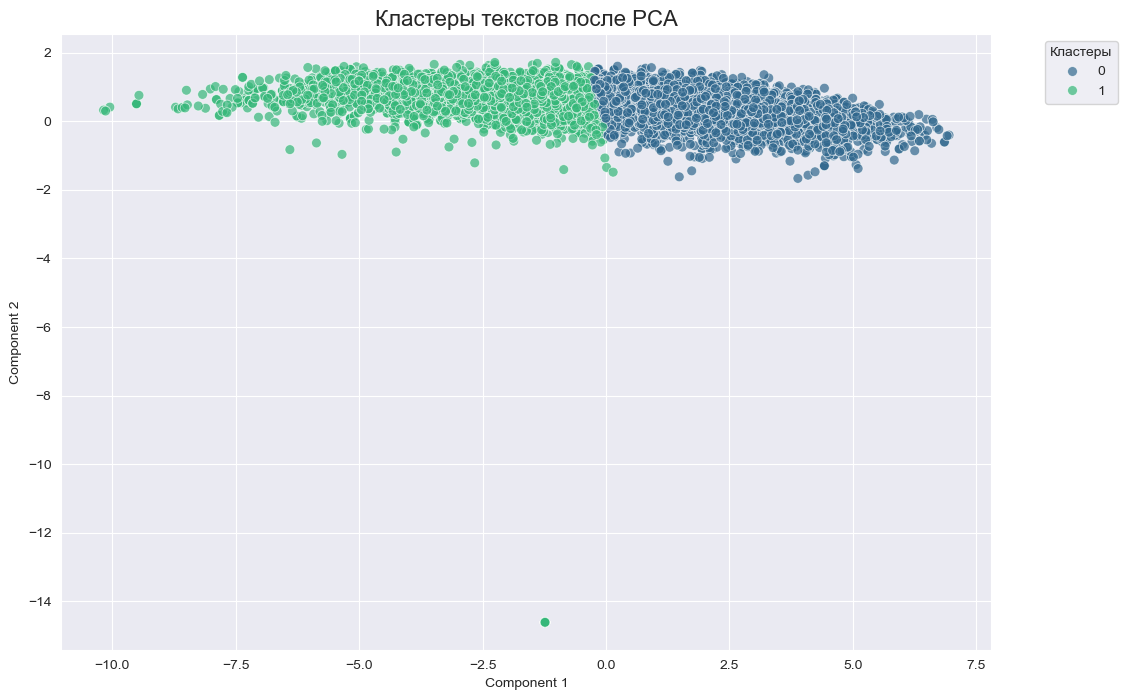

In [ ]:
plot_clusters(reduced_embeddings, clusters_reduced, "Кластеры текстов после PCA")

In [ ]:
# Уменьшение размерности с помощью t-SNE до 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

kmeans_reduced = KMeans(n_clusters=2, random_state=42)
clusters_reduced = kmeans_reduced.fit_predict(reduced_embeddings)
news_data["cluster_reduced"] = clusters_reduced

# Оценка качества кластеризации после уменьшения размерности
silhouette_after = silhouette_score(reduced_embeddings, clusters_reduced)
davies_bouldin_after = davies_bouldin_score(reduced_embeddings, clusters_reduced)
print(f"Silhouette Score after t-SNE: {silhouette_after}")
print(f"Davies-Bouldin Score after t-SNE: {davies_bouldin_after}")

Silhouette Score after t-SNE: 0.40251651406288147
Davies-Bouldin Score after t-SNE: 0.9926205654212055


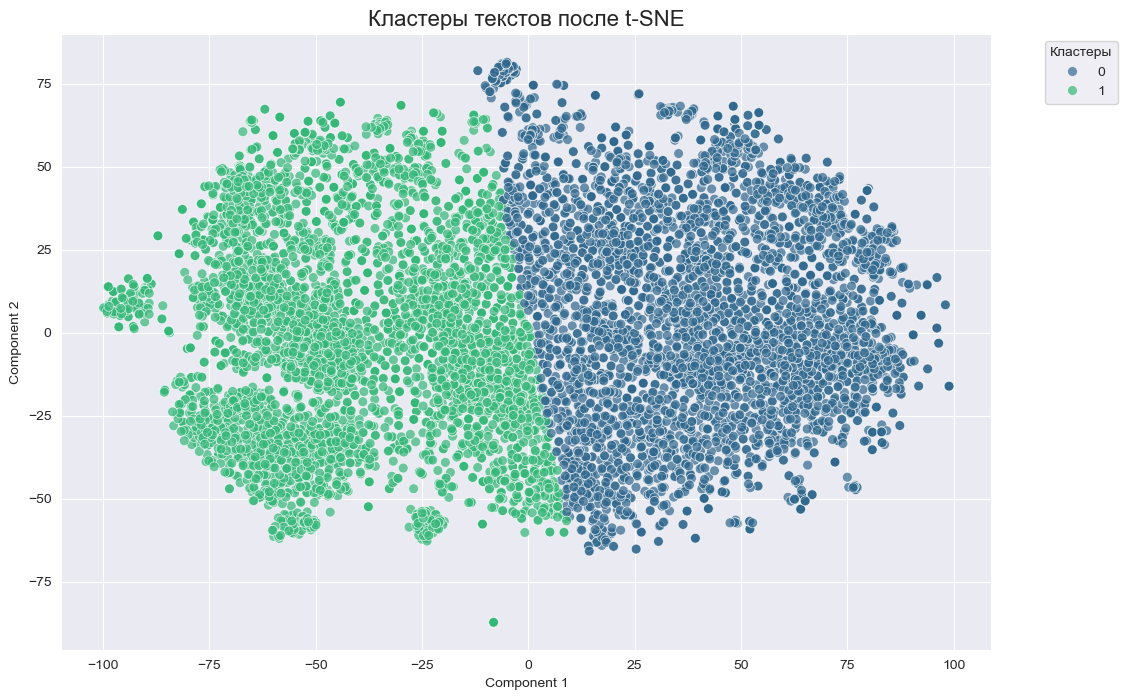

In [ ]:
plot_clusters(reduced_embeddings, clusters_reduced, "Кластеры текстов после t-SNE")

In [ ]:
import umap.umap_ as umap
# Уменьшение размерности с помощью UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
reduced_embeddings = umap_reducer.fit_transform(embeddings)

kmeans_reduced = KMeans(n_clusters=2, random_state=42)
clusters_reduced = kmeans_reduced.fit_predict(reduced_embeddings)
news_data["cluster_reduced"] = clusters_reduced

# Оценка качества кластеризации после уменьшения размерности
silhouette_after = silhouette_score(reduced_embeddings, clusters_reduced)
davies_bouldin_after = davies_bouldin_score(reduced_embeddings, clusters_reduced)
print(f"Silhouette Score after UMAP: {silhouette_after}")
print(f"Davies-Bouldin Score after UMAP: {davies_bouldin_after}")

/Users/aleksey.malysh/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Silhouette Score after UMAP: 0.4335632622241974
Davies-Bouldin Score after UMAP: 0.9110970191362499


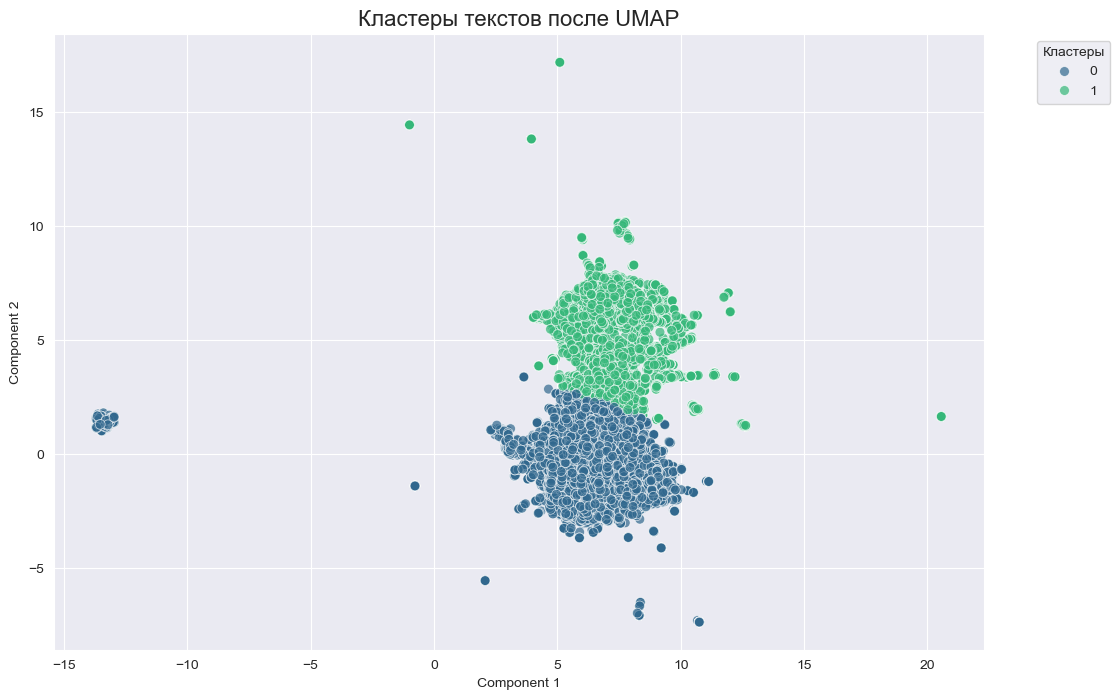

In [ ]:
plot_clusters(reduced_embeddings, clusters_reduced, "Кластеры текстов после UMAP")

# Снижение размерности с использованием `UMAP`, `t-SNE`, `Kernel PCA` и `Autoencoders`

In [5]:
news_data

id source_type                                              title  \
0        1        dzen  Количество раненых при нападении на магазин в ...   
1        2        dzen  Набиуллина: ипотечные ставки начнут снижаться ...   
2        3        dzen  RT выяснил личность подозреваемого в рабовладе...   
3        4        dzen    ТАСС: войска Украины пытаются покинуть Селидово   
4        5        dzen  Умер режиссер первых серий «Улиц разбитых фона...   
...    ...         ...                                                ...   
8602  7774       fomag  Юань стабилен: сильный доллар нивелирует оптим...   
8603  7774       fomag  ЮГК стремится устранить все нарушения в коротк...   
8604  7775       fomag  Южуралзолото установила диапазон размещения IP...   
8605  7775       fomag  Ян Арт про банковские вклады, облигации, золот...   
8606  7776       fomag  Яндекс во 2 кв увеличил прибыль на 45%, пообещ...   

                                                content  \
0     Число пострадавших при нападении посетителя с ...   
1     "По мере снижения инфляции ипотечные ставки бу...   
2     Как удалось выяснить, фигурант дела — 40-летни...   
3     Подразделения Вооруженных сил Украины (ВСУ) пр...   
4     Российский режиссер и сценарист Игорь Москвити...   
...                                                 ...   
8602  (Рейтер) рост доллара ввиду напряженности на Б...   
8603  МОСКВА, 14 августа. /ТАСС/. "Южуралзолото ГК" ...   
8604  (Рейтер) Российский золотодобытчик Южуралзолот...   
8605  Ключевую ставку ЦБ, конфликт на Ближнем Восток...   
8606  (Рейтер) Крупнейшая российская интернет-компан...   

                                                   link            date  \
0     https://dzen.ru/news/story/45396279-888c-507f-...  10/25/24 14:30   
1     https://dzen.ru/news/story/1c02c1ba-4c7d-5c07-...  10/25/24 15:49   
2     https://dzen.ru/news/story/3e598c32-677a-5e33-...  10/25/24 15:20   
3     https://dzen.ru/news/story/f7ba2bed-7abf-506c-...  10/25/24 15:03   
4     https://dzen.ru/news/story/f7ebd12d-543d-5214-...  10/25/24 14:52   
...                                                 ...             ...   
8602  https://fomag.ru/news-streem/yuan_stabilen_sil...  10/19/23 11:16   
8603  https://fomag.ru/news-streem/yugk-stremitsya-u...   8/14/24 10:04   
8604  https://fomag.ru/news-streem/yuzhuralzoloto_us...   11/13/23 9:54   
8605                 https://fomag.ru/news/yan-art-pro/  10/25/23 11:59   
8606  https://fomag.ru/news-streem/yandeks_vo_2_kv_u...    7/30/24 9:26   

       tags                                         post_links  \
0     index  ['https://vz.ru/news/2024/10/25/1294420.html',...   
1     index  ['https://realty.ria.ru/20241025/stavki-198010...   
2     index  ['https://russian.rt.com/russia/news/1387351-l...   
3     index  ['https://lenta.ru/news/2024/10/25/stalo-izves...   
4     index  ['https://www.kommersant.ru/doc/7263953', 'htt...   
...     ...                                                ...   
8602    NaN                                                NaN   
8603    NaN                                                NaN   
8604    NaN                                                NaN   
8605    NaN                                                NaN   
8606    NaN                                                NaN   

                                            source_link source_name  
0            https://vz.ru/news/2024/10/25/1294420.html          vz  
1     https://realty.ria.ru/20241025/stavki-19801093...         ria  
2     https://russian.rt.com/russia/news/1387351-lic...  russian.rt  
3     https://lenta.ru/news/2024/10/25/stalo-izvestn...       lenta  
4                 https://www.kommersant.ru/doc/7263953  kommersant  
...                                                 ...         ...  
8602                                                NaN     Reuters  
8603                                                NaN        tass  
8604                                              

In [6]:
df_t_c = news_data[['title', 'content']].copy()

df_t_c['text'] = df_t_c['title'] + ' ' + df_t_c['content']

df_t_c.loc[:, 'text'] = df_t_c['text'].apply(lambda x: str(x).lower())
df_t_c['text'][5]

'в вологодской области намерены ограничить продажу алкоголя в вологодской области намерены ограничить продажу алкоголя в рознице двумя часами в день. также документ вводит запрет на продажу алкоголя в рознице в праздничные дни. ограничения не коснутся организаций общественного питания. в начале текущего месяца филимонов заявил, что хочет убрать алкомаркеты с регионального рынка и полностью запретить розничную торговлю алкоголем в непосредственной близости от культурных объектов.'

In [7]:
!pip install transformers torch sentencepiece -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 16.4 MB/s eta 0:00:00


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

from transformers import AutoTokenizer, AutoModel

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
# Токенизация с использованием RuBERT
def preprocess_and_tokenize(text, tokenizer, max_length=128):
    tokens = tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return tokens


def generate_embeddings(tokens, model):
    with torch.no_grad():
        tokens = {key: val.to(device) for key, val in tokens.items()}
        outputs = model(**tokens)
        # Используем эмбеддинг CLS токена
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return embeddings

In [ ]:
df_t_c["tokens"] = df_t_c["text"].apply(lambda x: preprocess_and_tokenize(x, tokenizer))
df_t_c["embeddings"] = df_t_c["tokens"].apply(lambda x: generate_embeddings(x, model))
embeddings = np.vstack(df_t_c["embeddings"].values)

In [ ]:
# Сохранение эмбеддингов

np.save("embeddings.npy", embeddings)

In [11]:
embeddings = np.load("embeddings.npy")

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

## UMAP (с поиском оптимальных гиперпараметров)

In [12]:
import seaborn as sns

n_neighbors_values = [5, 15, 30, 50]  # Количество ближайших соседей
min_dist_values = [0.01, 0.1, 0.5]    # Минимальное расстояние между точками

results = []

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        umap_reducer = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=2,
            random_state=42,
            metric='cosine'
        )

        reduced_embeddings = umap_reducer.fit_transform(embeddings)

        kmeans = KMeans(
            n_clusters=5,
            random_state=42
        )

        clusters = kmeans.fit_predict(reduced_embeddings)

        silhouette = silhouette_score(reduced_embeddings, clusters)

        results.append({
            "n_neighbors": n_neighbors,
            "min_dist": min_dist,
            "silhouette_score": silhouette
        })

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr

In [13]:
results_df = pd.DataFrame(results)

In [14]:
results_df

n_neighbors  min_dist  silhouette_score
0             5      0.01          0.449968
1             5      0.10          0.392977
2             5      0.50          0.388401
3            15      0.01          0.458417
4            15      0.10          0.471416
5            15      0.50          0.406789
6            30      0.01          0.415962
7            30      0.10          0.455977
8            30      0.50          0.412124
9            50      0.01          0.447408
10           50      0.10          0.451075
11           50      0.50          0.416952

In [15]:
best_params = results_df.loc[results_df["silhouette_score"].idxmax()]

print("Лучшие гиперпараметры:")
print(best_params)

Лучшие гиперпараметры:
n_neighbors         15.000000
min_dist             0.100000
silhouette_score     0.471416
Name: 4, dtype: float64


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


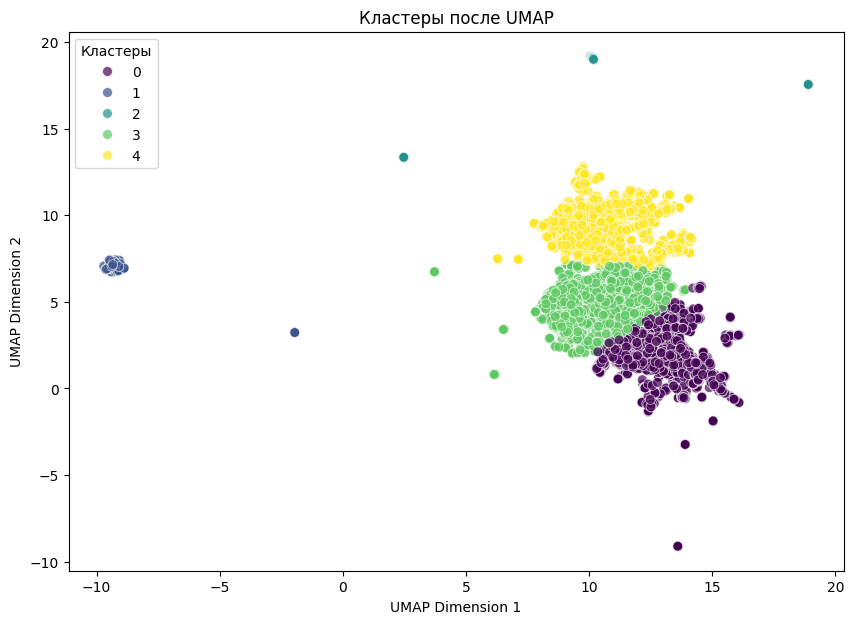

In [12]:
from sklearn.metrics import calinski_harabasz_score

# UMAP с оптимальными гиперпараметрами

umap_reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    metric='cosine'
)

reduced_embeddings_umap = umap_reducer.fit_transform(embeddings)

kmeans_umap = KMeans(n_clusters=5, random_state=42)
clusters_umap = kmeans_umap.fit_predict(reduced_embeddings_umap)

silhouette_umap = silhouette_score(reduced_embeddings_umap, clusters_umap)
davies_bouldin_umap = davies_bouldin_score(reduced_embeddings_umap, clusters_umap)
calinski_harabasz_umap = calinski_harabasz_score(reduced_embeddings_umap, clusters_umap)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings_umap[:, 0], y=reduced_embeddings_umap[:, 1], hue=clusters_umap, palette="viridis", s=50, alpha=0.7)
plt.title("Кластеры после UMAP")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Кластеры")
plt.show()

## t-SNE с предварительным PCA

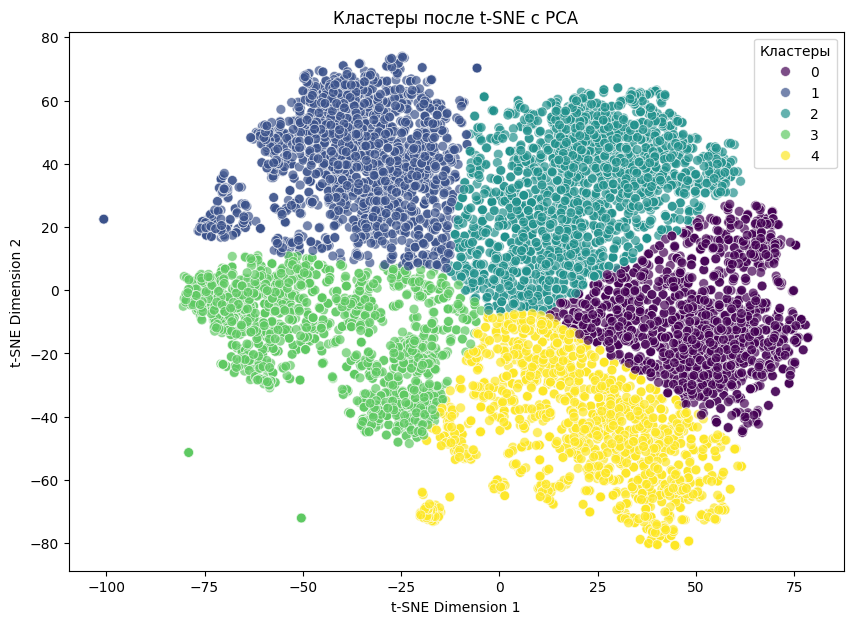

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


pca = PCA(n_components=50, random_state=42)
embeddings_pca = pca.fit_transform(embeddings)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings_tsne = tsne.fit_transform(embeddings_pca)

kmeans_tsne = KMeans(n_clusters=5, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(reduced_embeddings_tsne)

silhouette_tsne = silhouette_score(reduced_embeddings_tsne, clusters_tsne)
davies_bouldin_tsne = davies_bouldin_score(reduced_embeddings_tsne, clusters_tsne)
calinski_harabasz_tsne = calinski_harabasz_score(reduced_embeddings_tsne, clusters_tsne)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings_tsne[:, 0], y=reduced_embeddings_tsne[:, 1], hue=clusters_tsne, palette="viridis", s=50, alpha=0.7)
plt.title("Кластеры после t-SNE с PCA")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Кластеры")
plt.show()

## Kernel PCA

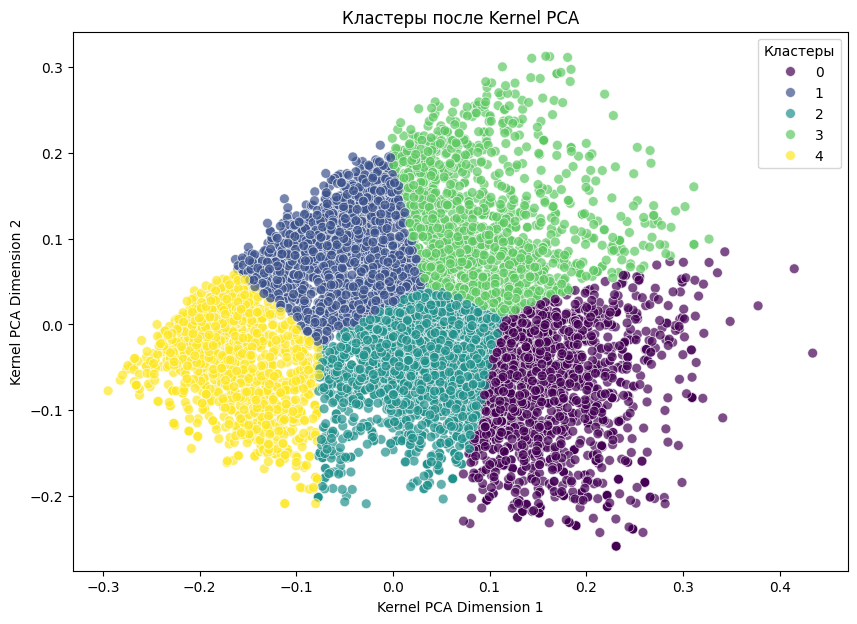

In [14]:
from sklearn.decomposition import KernelPCA


kpca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
reduced_embeddings_kpca = kpca.fit_transform(embeddings)

kmeans_kpca = KMeans(n_clusters=5, random_state=42)
clusters_kpca = kmeans_kpca.fit_predict(reduced_embeddings_kpca)

silhouette_kpca = silhouette_score(reduced_embeddings_kpca, clusters_kpca)
davies_bouldin_kpca = davies_bouldin_score(reduced_embeddings_kpca, clusters_kpca)
calinski_harabasz_kpca = calinski_harabasz_score(reduced_embeddings_kpca, clusters_kpca)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings_kpca[:, 0], y=reduced_embeddings_kpca[:, 1], hue=clusters_kpca, palette="viridis", s=50, alpha=0.7)
plt.title("Кластеры после Kernel PCA")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.legend(title="Кластеры")
plt.show()

## Autoencoders

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [16]:
input_dim = embeddings.shape[1]
encoding_dim = 2

embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)
dataset = TensorDataset(embeddings_tensor)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    for batch in dataloader:
        data = batch[0]
        encoded, decoded = model(data)
        loss = criterion(decoded, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [17]:
# Получение низкоразмерных представлений
model.eval()
with torch.no_grad():
    encoded_data, _ = model(embeddings_tensor)
    reduced_embeddings_ae = encoded_data.numpy()

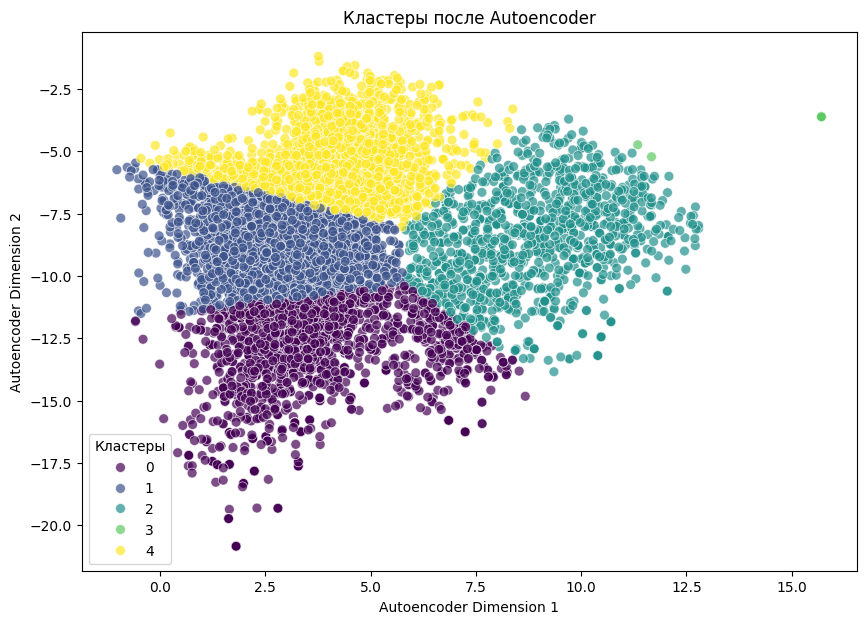

In [18]:
kmeans_ae = KMeans(n_clusters=5, random_state=42)
clusters_ae = kmeans_ae.fit_predict(reduced_embeddings_ae)

silhouette_ae = silhouette_score(reduced_embeddings_ae, clusters_ae)
davies_bouldin_ae = davies_bouldin_score(reduced_embeddings_ae, clusters_ae)
calinski_harabasz_ae = calinski_harabasz_score(reduced_embeddings_ae, clusters_ae)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings_ae[:, 0], y=reduced_embeddings_ae[:, 1], hue=clusters_ae, palette="viridis", s=50, alpha=0.7)
plt.title("Кластеры после Autoencoder")
plt.xlabel("Autoencoder Dimension 1")
plt.ylabel("Autoencoder Dimension 2")
plt.legend(title="Кластеры")
plt.show()

## Сравнение методов

In [19]:
import pandas as pd

results = pd.DataFrame({
    "Method": ["UMAP", "t-SNE + PCA", "Kernel PCA", "Autoencoder"],
    "Silhouette Score": [silhouette_umap, silhouette_tsne, silhouette_kpca, silhouette_ae],
    "Davies-Bouldin Index": [davies_bouldin_umap, davies_bouldin_tsne, davies_bouldin_kpca, davies_bouldin_ae],
    "Calinski-Harabasz Index": [calinski_harabasz_umap, calinski_harabasz_tsne, calinski_harabasz_kpca, calinski_harabasz_ae]
})

results

Method  Silhouette Score  Davies-Bouldin Index  \
0         UMAP          0.476600              0.615899   
1  t-SNE + PCA          0.369525              0.890397   
2   Kernel PCA          0.363008              0.901650   
3  Autoencoder          0.394417              0.716321   

   Calinski-Harabasz Index  
0             15011.271100  
1              7712.965465  
2              7568.347908  
3              8273.118954

In [20]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

pattern = r'[^\w\s]'

def preprocess_text(df: pd.Series) -> pd.Series:
    df = df.apply(lambda x: re.sub(pattern, '', str(x)))
    df_ = df.apply(lambda x: word_tokenize(x, language='russian'))
    stop_words = set(stopwords.words('russian'))
    df_ = df_.apply(lambda x: [word for word in x if word not in stop_words])
    df_ = df_.apply(lambda x: ' '.join(x))
    return df_

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df_t_c

title  \
0     Количество раненых при нападении на магазин в ...   
1     Набиуллина: ипотечные ставки начнут снижаться ...   
2     RT выяснил личность подозреваемого в рабовладе...   
3       ТАСС: войска Украины пытаются покинуть Селидово   
4     Умер режиссер первых серий «Улиц разбитых фона...   
...                                                 ...   
8602  Юань стабилен: сильный доллар нивелирует оптим...   
8603  ЮГК стремится устранить все нарушения в коротк...   
8604  Южуралзолото установила диапазон размещения IP...   
8605  Ян Арт про банковские вклады, облигации, золот...   
8606  Яндекс во 2 кв увеличил прибыль на 45%, пообещ...   

                                                content  \
0     Число пострадавших при нападении посетителя с ...   
1     "По мере снижения инфляции ипотечные ставки бу...   
2     Как удалось выяснить, фигурант дела — 40-летни...   
3     Подразделения Вооруженных сил Украины (ВСУ) пр...   
4     Российский режиссер и сценарист Игорь Москвити...   
...                                                 ...   
8602  (Рейтер) рост доллара ввиду напряженности на Б...   
8603  МОСКВА, 14 августа. /ТАСС/. "Южуралзолото ГК" ...   
8604  (Рейтер) Российский золотодобытчик Южуралзолот...   
8605  Ключевую ставку ЦБ, конфликт на Ближнем Восток...   
8606  (Рейтер) Крупнейшая российская интернет-компан...   

                                                   text  
0     количество раненых при нападении на магазин в ...  
1     набиуллина: ипотечные ставки начнут снижаться ...  
2     rt выяснил личность подозреваемого в рабовладе...  
3     тасс: войска украины пытаются покинуть селидов...  
4     умер режиссер первых серий «улиц разбитых фона...  
...                                                 ...  
8602  юань стабилен: сильный доллар нивелирует оптим...  
8603  югк стремится устранить все нарушения в коротк...  
8604  южуралзолото установила диапазон размещения ip...  
8605  ян арт про банковские вклады, облигации, золот...  
8606  яндекс во 2 кв увеличил прибыль на 45%, пообещ...  

[8607 rows x 3 columns]

In [22]:
df_t_c.loc[:, 'text'] = preprocess_text(df_t_c['text'])
df_t_c['text'][8605]

'ян арт банковские вклады облигации золото акции ключевую ставку цб конфликт ближнем востоке многое другое обсудили главным редактором портала finversia яном артом фоне конфликта палестины израиля золото дорожает 6 октября металл вырос цене 76 19838 тройскую унцию вероятно окончании острой фазы военных действий золото дешеветь конфликт ближнем востоке оказывает влияние нефть 20 нефти мировой рынок поставляется странами персидского залива нефть региона транспортируется ормузский пролив находящийся вблизи границ ирана многим ясно хотя это доказано конфликтом стоит иран лично сложилось ощущение иран таким образом наносит условно удар интересам саудовской аравии которая дни должна пойти вслед оаэ нормализацию отношений тельавивом естественно момент израильские ракеты бьют арабам саудовская аравия это сделать разъясняет эксперт 6 октября нефть марки brent выросла цене 35 8791 баррель главный редактор finversia считает нефтяной кризис 1973 года повторится напомним арабские страны входящие оа

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df_t_c["text"])


def get_top_words(clusters, tfidf_matrix, tfidf, top_n=10):
    for cluster_id in range(5):
        cluster_texts = df_t_c[clusters == cluster_id]["text"]
        tfidf_matrix_cluster = tfidf.transform(cluster_texts)
        tfidf_scores = np.array(tfidf_matrix_cluster.mean(axis=0)).flatten()
        top_words_idx = tfidf_scores.argsort()[-top_n:][::-1]
        top_words = [tfidf.get_feature_names_out()[i] for i in top_words_idx]
        print(f"Кластер {cluster_id}: {', '.join(top_words)}")

In [25]:
print("Ключевые слова для кластеров (UMAP):")
get_top_words(clusters_umap, tfidf_matrix, tfidf)

Ключевые слова для кластеров (UMAP):
Кластер 0: акции, года, компании, рублей, акций, роста, мнение, млрд, рост, рубля
Кластер 1: году, рост, россии, рф, тасс, октября, года, нефть, 2023, млрд
Кластер 2: руб, млрд, составила, рынок, рынка, акций, цен, банк, сентября, это
Кластер 3: года, компании, млрд, рф, рублей, тасс, россии, году, также, это
Кластер 4: сигнал, россии, это, октября, пока, также, года, время, изза, рф


In [26]:
print("Ключевые слова для кластеров (Kernel PCA):")
get_top_words(clusters_kpca, tfidf_matrix, tfidf)

Ключевые слова для кластеров (Kernel PCA):
Кластер 0: года, рублей, акции, млрд, акций, компании, руб, роста, мнение, рост
Кластер 1: сигнал, россии, это, года, пока, также, рф, октября, время, которые
Кластер 2: года, рублей, компании, млрд, акции, акций, году, мнение, 2024, также
Кластер 3: года, россии, это, компании, рф, также, году, рублей, тасс, сигнал
Кластер 4: россии, также, года, октября, году, это, рф, время, рублей, млрд


In [28]:
print("\nКлючевые слова для кластеров (t-SNE + PCA):")
get_top_words(clusters_tsne, tfidf_matrix, tfidf)


Ключевые слова для кластеров (t-SNE + PCA):
Кластер 0: года, рублей, компании, млрд, акции, акций, руб, мнение, компания, год
Кластер 1: сигнал, россии, это, пока, октября, года, также, время, изза, рф
Кластер 2: года, тасс, рф, россии, млрд, компании, также, году, рублей, это
Кластер 3: также, россии, года, октября, году, компании, время, рублей, который, рф
Кластер 4: года, акции, акций, индекс, компании, рублей, рынок, рубля, млрд, сша


In [29]:
print("\nКлючевые слова для кластеров (Autoencoder):")
get_top_words(clusters_ae, tfidf_matrix, tfidf)


Ключевые слова для кластеров (Autoencoder):
Кластер 0: года, акции, акций, рублей, компании, индекс, роста, рубля, рынок, млрд
Кластер 1: года, компании, млрд, рублей, году, акций, руб, компания, рф, также
Кластер 2: россии, также, октября, время, года, который, изза, году, это, рф
Кластер 3: прибыли, словам, который, является, данные, дивидендов, дивиденды, доходность, изза, инвесторов
Кластер 4: сигнал, россии, это, пока, года, рф, также, октября, время, которые


- **UMAP**: Кластеры достаточно четко разделены по тематикам (Финансы, Экономика, Корпоративные новости, Общие новости).
    
- **Kernel PCA**: Кластеры менее четкие, есть перекрытия (например, Кластер 3 и Кластер 4).
    
- **t-SNE + PCA**: Кластеры также менее четкие, особенно Кластер 2 и Кластер 3.
    
- **Autoencoder**: Кластеры более интерпретируемы, особенно выделяется Кластер 3 (Финансы/Инвестиции).

UMAP:

- **Кластер 0**: Акции, компании, рост, рубль, млрд → **Финансы/Рынок акций**.
    
- **Кластер 1**: Рост, Россия, нефть, млрд → **Экономика/Нефть**.
    
- **Кстер 2**: Рынок, акции, банк, цены → **Финансы/Банки**.
    
- **Кластер 3**: Компании, млрд, Россия → **Корпоративные новости**.
    
- **Кластер 4**: Сигнал, Россия, время → **Общие новости**.
    

#### Kernel PCA:

- **Кластер 0**: Акции, компании, рост, рубль, млрд → **Финансы/Рынок акций**.
    
- **Кластер 1**: Сигнал, Россия, время → **Общие новости**.
    
- **Кластер 2**: Компании, млрд, рубль → **Корпоративные новости**.
    
- **Кластер 3**: Россия, компании, рубль → **Экономика/Корпоративные новости**.
    
- **Кластер 4**: Россия, рубль, млрд → **Экономика**.
    

#### t-SNE + PCA:

- **Кластер 0**: Акции, компании, рубль, млрд → **Финансы/Рынок акций**.
    
- **Кластер 1**: Сигнал, Россия, время → **Общие новости**.
    
- **Кластер 2**: Россия, млрд, компании → **Экономика/Корпоративные новости**.
    
- **Кластер 3**: Россия, компании, время → **Общие новости**.
    
- **Кластер 4**: Акции, индекс, рынок → **Финансы/Рынок акций**.
    

#### Autoencoder:

- **Кластер 0**: Акции, индекс, рынок → **Финансы/Рынок акций**.
    
- **Кластер 1**: Компании, млрд, рубль → **Корпоративные новости**.
    
- **Кластер 2**: Россия, время, из-за → **Общие новости**.
    
- **Кластер 3**: Прибыль, дивиденды, инвесторы → **Финансы/Инвестиции**.
    
- **Кластер 4**: Сигнал, Россия, время → **Общие новости**.